# Analysis

In [25]:
##

In [19]:
# Import dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sb
import numpy as np
import datetime
from pprint import pprint
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [20]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [21]:
# Twitter credentials and APi authentification
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
# List to hold results
sentiment = []
# List to hold results
results_list = []

# Target Search Term
target_users = ("@RTC", "@APTA_Transit","@SFBart","@MTA","@CTA")
target_hashtags = ("#UBER", "#LYFT")

# Variables for holding sentiments
# compound_list = []
# positive_list = []
# negative_list = []
# neutral_list = []

In [23]:
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=1000, result_type="recent")
#     pprint (public_tweets)
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

[]
[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_Nation

 {'Compound': 0.296,
  'Date': 'Mon Apr 09 19:45:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.879,
  'Positive': 0.121,
  'Tweet Count': 91,
  'Tweet text': 'Join us for our next CUTR Transportation Webcast:  '
                'Understanding the Effects of Demographic and Socio-Economic '
                'Fact… https://t.co/WDtQTTxAg8',
  'User': '@APTA_Transit'},
 {'Compound': 0.3818,
  'Date': 'Mon Apr 09 15:01:40 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.822,
  'Positive': 0.178,
  'Tweet Count': 92,
  'Tweet text': '@moovelUS launches FareShare transit benefits system at '
                '@APTA_Transit Conference. Take a look here: '
                'https://t.co/6MvaiUmoLt',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:57:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 93,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing

  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 13:39:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 79,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 13:35:40 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 80,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 13:29:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 81,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more 

  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:53:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 57,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 22:52:21 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 58,
  'Tweet text': '@SFBART links Oakland to San Francisco. The system has over '
                '425,000 riders per day and is a combination of elevated… '
                'https://t.co/0R5Ky3r5Op',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:40:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 59,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
  

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

 {'Compound': 0.1027,
  'Date': 'Wed Apr 11 11:47:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.865,
  'Positive': 0.135,
  'Tweet Count': 67,
  'Tweet text': '@canuck_issues @APTA_Transit @JohnTory @TorontoComms '
                "@TorontoStar @CTVToronto @torontolife It's cleared. ^KM",
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Wed Apr 11 11:26:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 68,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Wed Apr 11 11:26:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 69,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
 

  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.4926,
  'Date': 'Tue Apr 17 00:09:43 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.862,
  'Positive': 0.138,
  'Tweet Count': 41,
  'Tweet text': '@SFBART Thanks for the link! The escalator I’m concerned with '
                '- the up escalator on the Powell side - is not listed… '
                'https://t.co/xiEUGjDxC7',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 00:05:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 42,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound

  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:12:59 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 20,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:12:53 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 21,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.5423,
  'Date': 'Tue Apr 17 03:12:36 +0000 2018',
  'Negative': 0.538,
  'Neutral': 0.462,
  'Positive': 0.0,
  'Tweet Count': 22,
  'Tweet text': '@Mbkook24 @MTA Fuck Cuomo.',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:12:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 23,
  'Tweet text': 'RT 

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Tue Apr 10 06:18:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 82,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.296,
  'Date': 'Tue Apr 10 02:53:52 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.896,
  'Positive': 0.104,
  'Tweet Count': 83,
  'Tweet text': 'RT @CUTRUSF: Join us for our next CUTR Transportation '
                'Webcast:  Understanding the Effects of Demographic and '
                'Socio-Economic Factors on Publ…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Tue Apr 10 01:36:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 84,
  'Tweet text': 'RT @TheRapid: Transit-orie

  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:31:29 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 60,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:14:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 61,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'


  'Positive': 0.0,
  'Tweet Count': 40,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:01:34 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 41,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.34,
  'Date': 'Tue Apr 17 03:00:42 +0000 2018',
  'Negative': 0.324,
  'Neutral': 0.676,
  'Positive': 0.0,
  'Tweet Count': 42,
  'Tweet text': '@jbguild @NYCTSubway @MTA @NY1 Crazy deal',
  'User': '@MTA'},
 {'Compound': -0.765,
  'Date': 'Tue Apr 17 03:00:25 +0000 2018',
  'Negative': 0.352,
  'Neutral': 0.527,
  'Positive': 0.121,
  'Tweet Count': 43,
  'Tweet text': 'None of these angry passengers understand that the @MTA '
                'arbitrarily swapping the 

  'Positive': 0.135,
  'Tweet Count': 22,
  'Tweet text': "RT @cta: @meggrave @CTABlueLn We're sorry to hear you were "
                "delayed tonight, but you'll be pleased to know new railcars "
                'are on the way. Lear…',
  'User': '@CTA'},
 {'Compound': -0.5256,
  'Date': 'Tue Apr 17 01:32:25 +0000 2018',
  'Negative': 0.326,
  'Neutral': 0.674,
  'Positive': 0.0,
  'Tweet Count': 23,
  'Tweet text': 'RT @gochris41: @cta Very unreliable service. Very sad',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:29:56 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 24,
  'Tweet text': '@derrickcuse @Vote4Mayor2019 @ChicagosMayor @cta Russian.',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:28:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'RT @cta: Some Howard-bound Red Line trains are operating with '
                'residual delays after an ea

In [24]:
news_sentiment_df = pd.DataFrame.from_dict(sentiment).round(3)
news_sentiment_df["User"].describe()
# news_sentiment_df

count               400
unique                4
top       @APTA_Transit
freq                100
Name: User, dtype: object

In [25]:
#Pull in Uber and Lyft tweets
# Loop through all target users
for user in target_users:
    
    # count the tweet    
    counter = 0
    
    # Grab 100 tweets
    public_tweets = api.search(user, count=100, result_type="recent")
        
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text = tweet["text"]
        tweets_count = counter

        #Add sentiments for ech tweet to the sentiments list
        sentiment.append ({"User": user,
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos,
            "Neutral": neu,
            "Negative": neg,
            "Tweet text": tweet_text,
            "Tweet Count": counter})

        counter = counter + 1

            # Print the Sentiments
    pprint(sentiment)
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

  'Positive': 0.25,
  'Tweet Count': 82,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.296,
  'Date': 'Tue Apr 10 02:53:52 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.896,
  'Positive': 0.104,
  'Tweet Count': 83,
  'Tweet text': 'RT @CUTRUSF: Join us for our next CUTR Transportation '
                'Webcast:  Understanding the Effects of Demographic and '
                'Socio-Economic Factors on Publ…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Tue Apr 10 01:36:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 84,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA

  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 60,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:14:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 61,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:11:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 62,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @At

  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 41,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.34,
  'Date': 'Tue Apr 17 03:00:42 +0000 2018',
  'Negative': 0.324,
  'Neutral': 0.676,
  'Positive': 0.0,
  'Tweet Count': 42,
  'Tweet text': '@jbguild @NYCTSubway @MTA @NY1 Crazy deal',
  'User': '@MTA'},
 {'Compound': -0.765,
  'Date': 'Tue Apr 17 03:00:25 +0000 2018',
  'Negative': 0.352,
  'Neutral': 0.527,
  'Positive': 0.121,
  'Tweet Count': 43,
  'Tweet text': 'None of these angry passengers understand that the @MTA '
                'arbitrarily swapping the D and F lines is a CRY FOR HELP :(',
  'User': '@MTA'},
 {'Compound': 0.6486,
  'Date': 'Tue Apr 17 03:00:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.751,
  'Positive': 0.249,
  'Tweet Count': 44,
  'Tweet text': '@MTA = Sh*t. Wait when over 60degree smell like

  'Date': 'Tue Apr 17 01:32:25 +0000 2018',
  'Negative': 0.326,
  'Neutral': 0.674,
  'Positive': 0.0,
  'Tweet Count': 23,
  'Tweet text': 'RT @gochris41: @cta Very unreliable service. Very sad',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:29:56 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 24,
  'Tweet text': '@derrickcuse @Vote4Mayor2019 @ChicagosMayor @cta Russian.',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:28:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'RT @cta: Some Howard-bound Red Line trains are operating with '
                'residual delays after an earlier train standing at Roosevelt; '
                'service is resu…',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:27:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 26,
  'Tweet text': "RT @akeyachicago: @cta There wasn

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Tue Apr 10 01:36:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 84,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Tue Apr 10 01:36:12 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 85,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 10 00:56:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 86,
  'Tweet text': 'RT @APTA_Transit: https://t.co/iNuedb2jYw',
  'User': '@APTA_Transit'},

 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:54:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 56,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:53:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 57,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 22:52:21 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 58,
  'Tweet text': '@SFBART links Oakland to 

  'Date': 'Tue Apr 17 03:20:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 15,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:20:32 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 16,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:19:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 17,
  'Tweet text': 'RT @UPSTANDMovement: "The @MTA has been speaking about adding '
                'elevators to the Astoria Blvd station since the late '
                '1970s...the dates provid…',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:17:34 +000

 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:32:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 98,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.2168,
  'Date': 'Tue Apr 17 02:30:27 +0000 2018',
  'Negative': 0.07,
  'Neutral': 0.824,
  'Positive': 0.106,
  'Tweet Count': 99,
  'Tweet text': '@NYCTSubway ok? can you open shake shack, chipotle or '
                'anything else around here and get me dinner? the ftrain is '
                're… https://t.co/43Zil3lzCQ',
  'User': '@MTA'},
 {'Compound': -0.5106,
  'Date': 'Tue Apr 17 03:21:04 +0000 2018',
  'Negative': 0.136,
  'Neutral': 0.864,
  'Positive': 0.0,
  'Tweet Count': 0,
  'Tweet text': 'RT @cta: Some Howard-bound Red Line trains are operating with '
                'residual delays after an earlier sick customer at Roosevelt; '
                'servic

  'Tweet Count': 79,
  'Tweet text': 'RT @cta: Howard-bound Red Line trains are standing at Jarvis '
                'due to a report of a minor fire at track level; crews working '
                'to restore servi…',
  'User': '@CTA'},
 {'Compound': -0.34,
  'Date': 'Mon Apr 16 20:50:27 +0000 2018',
  'Negative': 0.094,
  'Neutral': 0.906,
  'Positive': 0.0,
  'Tweet Count': 80,
  'Tweet text': 'RT @cta: Some Howard-bound Red Line trains are operating with '
                'residual delays after an earlier report of a minor fire at '
                'track level at Jar…',
  'User': '@CTA'},
 {'Compound': -0.8313,
  'Date': 'Mon Apr 16 20:47:29 +0000 2018',
  'Negative': 0.403,
  'Neutral': 0.485,
  'Positive': 0.112,
  'Tweet Count': 81,
  'Tweet text': '@cta Just missed a train at Howard. Female employee laughed '
                'hysterically. WTF is wrong with your #asswipe employees????',
  'User': '@CTA'},
 {'Compound': -0.34,
  'Date': 'Mon Apr 16 20:42:46 +0000 2018',
  'Nega

  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 19:37:18 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 59,
  'Tweet text': '@BrentToderian @TransLink @grescoe @FreeRangeKids '
                '@5kids1condo @theoverheadwire @MassTransitmag @APTA_Transit '
                'Congr… https://t.co/vDd3Yp5vE1',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 16:16:10 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 60,
  'Tweet text': '@BrentToderian @TransLink @grescoe @FreeRangeKids '
                '@5kids1condo @theoverheadwire @MassTransitmag @APTA_Transit '
                'Live… https://t.co/FpWYE9kHqt',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Wed Apr 11 15:14:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 61,
  'Tweet text': '@BrentToderian @TransLink @grescoe @FreeRangeKids '
                '@5kids1condo @t

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

  'Date': 'Wed Apr 11 11:26:45 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.75,
  'Positive': 0.25,
  'Tweet Count': 68,
  'Tweet text': 'RT @TheRapid: Transit-oriented development strengthens '
                'communities: https://t.co/0haDJnxXsR #Voices4Transit\n'
                '@APTA_Transit https://t.co/pFzL…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Wed Apr 11 11:26:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 69,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 20:11:01 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 70,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs 

  'Date': 'Mon Apr 16 23:50:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 43,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 23:43:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 44,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 23:34:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 45,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
          

  'Tweet text': '@Mbkook24 @MTA Fuck Cuomo.',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:12:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 23,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:12:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 24,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:11:49 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 25,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'D

  'Date': 'Tue Apr 17 02:37:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 86,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:36:57 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 87,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:36:27 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 88,
  'Tweet text': 'Me wondering why @MTA has the F running on the D line and the '
                'D running on the F line... https://t.co/uAZIIRCl0q',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:34:39 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
 

 {'Compound': 0.7964,
  'Date': 'Mon Apr 16 22:03:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.664,
  'Positive': 0.336,
  'Tweet Count': 60,
  'Tweet text': '@originalbighead @unsuckdcmetro @wmata @dcmetrosucks The @cta '
                'is my truest and deepest public transit love. I miss… '
                'https://t.co/0LpDFQPcJd',
  'User': '@CTA'},
 {'Compound': -0.4019,
  'Date': 'Mon Apr 16 21:57:37 +0000 2018',
  'Negative': 0.114,
  'Neutral': 0.886,
  'Positive': 0.0,
  'Tweet Count': 61,
  'Tweet text': 'RT @cta: Some 95th-bound Red Line  trains are operating with '
                'residual delays after an ealier mechanical problem on a train '
                'at Jarvis; servi…',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 21:53:19 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 62,
  'Tweet text': "@cta y'all ever bringing back transfers at Howard station? It "
                "really can't be that complicated t

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 15,
  'Tweet text': 'RT @APTA_Transit: From coast to coast, public transportation '
                'is connecting communities and riders each and every day. RT '
                'our post and tell…',
  'User': '@APTA_Transit'},
 {'Compound': 0.8402,
  'Date': 'Fri Apr 13 19:13:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.679,
  'Positive': 0.321,
  'Tweet Count': 16,
  'Tweet text': 'RT @PeterVarga_: Yesterday the TSA VIPR team came to Rapid '
                'Central Station. They are a great asset to our public transit '
                'security. Interact…',
  'User': '@APTA_Transit'},
 {'Compound': 0.8402,
  'Date': 'Fri Apr 13 19:01:51 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.667,
  'Positive': 0.333,
  'Tweet Count': 17,
  'Tweet text': 'Yesterday the TSA VIPR team came to Rapid Central Station. '
                'They are a great asset to our public transit security. I… '
                'https://t.co/KepxRZsM5F',

  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:57:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 93,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:57:26 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 94,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up for '
                'public transit &amp; increasing investment in its 2018 '
                'budget.  Keep it up for 2019 a…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 09 14:54:14 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 95,
  'Tweet text': 'RT @APTA_Transit: We applaud Congress for standing up 

  'Date': 'Mon Apr 16 22:14:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 61,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 22:11:36 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 62,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 22:11:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 63,
  'Tweet text': 'RT @AlamedaCTC: Make a pledge for #EarthDay to 

[{'Compound': 0.4588,
  'Date': 'Mon Apr 16 21:11:54 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 0,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 17:05:41 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 1,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National awards, Las Cruces Wed/Thur for NM transpo '
                'conf (&amp; green chile 😋), Fort W…',
  'User': '@APTA_Transit'},
 {'Compound': 0.4588,
  'Date': 'Mon Apr 16 16:01:11 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 2,
  'Tweet text': 'RT @ASCEKristina: On the road again... DC Tues for '
                '@ACEC_National 

                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 10 15:43:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 76,
  'Tweet text': 'RT @APTA_Transit: https://t.co/iNuedb2jYw',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 14:55:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 77,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 14:44:02 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 78,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near pub

  'Positive': 0.0,
  'Tweet Count': 42,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 23:50:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 43,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 23:43:35 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 44,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
 

  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:25:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 7,
  'Tweet text': 'RT @Mbkook24: Rain Room but without the line! @MTA '
                'https://t.co/RUBudFPehn',
  'User': '@MTA'},
 {'Compound': 0.8176,
  'Date': 'Tue Apr 17 03:25:09 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.585,
  'Positive': 0.415,
  'Tweet Count': 8,
  'Tweet text': 'Oh @MTA in your infinite wisdom. I see an easier solution. I '
                'think everyone does. #dumbdumbs https://t.co/MawBkz8Sym',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:25:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 9,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #jus

  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 69,
  'Tweet text': '@jbguild @Brazil201 @NYCTSubway @MTA @NY1 @marisol2929',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:49:20 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 70,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:48:01 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 71,
  'Tweet text': 'My Q this morning had the same water feature installed... '
                'inside the train 🤔 @NYCTSubway @MTA https://t.co/fov16YbsjJ',
  'User': '@MTA'},
 {'Compound': -0.4019,
  'Date': 'Tue Apr 17 02:47:43 +0000 2018',
  'Negative': 0.147,
  'Neutral': 0.737,
  'Positive': 0.115,
  'Tweet Count': 72,
  'Tweet text': 'i want a monthly unlimited card and a letter of apology you '
 

  'User': '@CTA'},
 {'Compound': 0.296,
  'Date': 'Mon Apr 16 22:23:28 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.864,
  'Positive': 0.136,
  'Tweet Count': 44,
  'Tweet text': 'RT @cta: Howard-bound Red Line trains are standing at '
                'Roosevelt; crews working to restore service.',
  'User': '@CTA'},
 {'Compound': 0.6588,
  'Date': 'Mon Apr 16 22:23:27 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.747,
  'Positive': 0.253,
  'Tweet Count': 45,
  'Tweet text': "'L' riders!  Here are some great Chicago Neighborhood Dining "
                'Options for you:  https://t.co/0OTSzz3COC… '
                'https://t.co/3DmWWx6IYr',
  'User': '@CTA'},
 {'Compound': -0.5256,
  'Date': 'Mon Apr 16 22:22:24 +0000 2018',
  'Negative': 0.404,
  'Neutral': 0.596,
  'Positive': 0.0,
  'Tweet Count': 46,
  'Tweet text': '@cta Very unreliable service. Very sad',
  'User': '@CTA'},
 {'Compound': 0.3182,
  'Date': 'Mon Apr 16 22:21:16 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.874

                'https://t.co/KepxRZsM5F',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 13 18:57:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 18,
  'Tweet text': 'RT @APTA_Transit: From coast to coast, public transportation '
                'is connecting communities and riders each and every day. RT '
                'our post and tell…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 13 16:17:55 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 19,
  'Tweet text': 'RT @APTA_Transit: From coast to coast, public transportation '
                'is connecting communities and riders each and every day. RT '
                'our post and tell…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Fri Apr 13 15:58:23 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 20,
  'Tweet text': 'RT @APTA_Transit: From coast to coast, pub

                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 16:02:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 75,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 10 15:43:30 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 76,
  'Tweet text': 'RT @APTA_Transit: https://t.co/iNuedb2jYw',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 14:55:00 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 77,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near pub

  'Tweet text': 'RT @SFBART: @omaryak Flock it. I can’t take the punishment '
                'anymore. It’s too burdensome.',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 00:54:39 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 30,
  'Tweet text': '@SFBART  Can’t u assign 1 cop to each station to patrol for '
                'drug use? Just saw woman sitting on MONT platform shooting '
                'up.',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 00:54:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 31,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': -0.5367,
  'Date': 'Tue Apr 17 00:53:48 +0000 2018',
  'Negative': 0.148,
  'Neutral': 0.852,
  'Positive': 0.0,
  'Tweet Count': 32,
 

  'Negative': 0.0,
  'Neutral': 0.585,
  'Positive': 0.415,
  'Tweet Count': 8,
  'Tweet text': 'Oh @MTA in your infinite wisdom. I see an easier solution. I '
                'think everyone does. #dumbdumbs https://t.co/MawBkz8Sym',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:25:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 9,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.1531,
  'Date': 'Tue Apr 17 03:24:18 +0000 2018',
  'Negative': 0.115,
  'Neutral': 0.885,
  'Positive': 0.0,
  'Tweet Count': 10,
  'Tweet text': 'F trains are making D stops and D trains are making F stops '
                'because they both have work but why not just keep the t… '
                'https://t.co/Ooa783rhwD',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:22:22 +0000 2018',
  'Negative': 0

  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 91,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.5531,
  'Date': 'Tue Apr 17 02:33:38 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.784,
  'Positive': 0.216,
  'Tweet Count': 92,
  'Tweet text': "@birdrib_ @MTA You're very, very welcome. They have plenty "
                'more where that came from.',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:33:38 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 93,
  'Tweet text': "@realDonaldTrump why don't ya give the @MTA the funds they "
                "need to rebuild our stations? they haven't been touched… "
                'https://t.co/uL8zx5Hh2z',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:33:38 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive':

  'Tweet Count': 70,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.7717,
  'Date': 'Tue Apr 10 17:49:31 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.688,
  'Positive': 0.312,
  'Tweet Count': 71,
  'Tweet text': 'RT @APTA_Transit: Public transportation supports jobs in more '
                'ways than one.  It creates jobs by attracting investments '
                'near public transit…',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 10 17:25:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 72,
  'Tweet text': '#mobility is here to stay. @APTA_Transit trying to turn the '
                'oldest ship in the #SmartCities fleet: Public #transit… '
                'https://t.co/gEjZ95BhrL',
  'User': '@APTA_Transit'},
 {'Compound': 0

  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 23:34:07 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 45,
  'Tweet text': 'RT @SFBART: The BART Police Citizen Review Board is in the '
                'process of recruiting a public-at-large appointee.\n'
                'Members of the BPCRB work to…',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Mon Apr 16 23:31:42 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.885,
  'Positive': 0.115,
  'Tweet Count': 46,
  'Tweet text': 'RT @OracleArena: Heads up #DubNation! 🚨\n'
                '\n'
                'There is a 7:05 pm @Athletics game at @OAColiseum tonight. \n'
                '\n'
                'Please arrive early or take @SFBART t…',
  'User': '@SFBart'},
 {'Compound

  'Negative': 0.0,
  'Neutral': 0.588,
  'Positive': 0.412,
  'Tweet Count': 1,
  'Tweet text': '@jbguild @NYCTSubway @MTA @NY1 Waterfall wow. The rats are '
                'probably loving it though',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:29:33 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 2,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.296,
  'Date': 'Tue Apr 17 03:28:24 +0000 2018',
  'Negative': 0.136,
  'Neutral': 0.864,
  'Positive': 0.0,
  'Tweet Count': 3,
  'Tweet text': '@jbguild @NYCTSubway @MTA @NY1 This guy’s mentality “rain or '
                'no rain, I’m getting ma money”',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:28:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 4,
  'Tweet text': 'RT @jbguild: scenes from

  'Date': 'Tue Apr 17 02:38:49 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 84,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:37:49 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 85,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:37:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 86,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:36:57 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Posi

  'User': '@CTA'},
 {'Compound': 0.296,
  'Date': 'Mon Apr 16 21:33:19 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.864,
  'Positive': 0.136,
  'Tweet Count': 66,
  'Tweet text': 'RT @cta: Loop-bound Pink Line trains are standing at Western; '
                'crews working to restore service.',
  'User': '@CTA'},
 {'Compound': 0.6124,
  'Date': 'Mon Apr 16 21:28:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.792,
  'Positive': 0.208,
  'Tweet Count': 67,
  'Tweet text': 'And I’d like to thank @cta for having the temperatures posted '
                'on the platform signs. Those are always accurate. “Ne… '
                'https://t.co/rA4If5a3EV',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 21:25:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 68,
  'Tweet text': 'Which means instead of taking a $2 @cta L ride and a .50 bus '
                'transfer I’m out $40 for an @Uber. I guess I’m lucky.… '
                'https:/

  'Tweet text': '@BrentToderian @TransLink @grescoe @FreeRangeKids '
                '@5kids1condo @theoverheadwire @MassTransitmag @APTA_Transit '
                'We wa… https://t.co/LJrLOxWf95',
  'User': '@APTA_Transit'},
 {'Compound': 0.0,
  'Date': 'Thu Apr 12 14:05:20 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 46,
  'Tweet text': 'Did you know? Households in transit-oriented neighborhoods '
                'spend, on average, 15% of their income on transportation… '
                'https://t.co/gf8Ll3dYx1',
  'User': '@APTA_Transit'},
 {'Compound': 0.8553,
  'Date': 'Thu Apr 12 13:05:17 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.561,
  'Positive': 0.439,
  'Tweet Count': 47,
  'Tweet text': 'RT @APTA_Transit: Congratulations to @RideKCTransit on their '
                'newly awarded grant for Bus Rapid Transit! '
                'https://t.co/BVuWJFGAMv',
  'User': '@APTA_Transit'},
 {'Compound': -0.8345,
  'Date': 'Thu Apr 12 11:

  'Tweet text': 'WARRIORS!! #WARRIORS!! @WARRIORS!! @OracleArena #DubNation '
                '#LockIn #Game2 #Round1 #omw @SFBART 🤗 #GoDubs… '
                'https://t.co/XkWqe5bUc9',
  'User': '@SFBart'},
 {'Compound': 0.743,
  'Date': 'Tue Apr 17 01:05:03 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.687,
  'Positive': 0.313,
  'Tweet Count': 25,
  'Tweet text': '@SFBART montegomery platform elevator 6pm. Looks like poop, '
                'smells like poop. Please take the elevator out of servi… '
                'https://t.co/yTEK4uoa1v',
  'User': '@SFBart'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 01:00:06 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 26,
  'Tweet text': 'Avez-vous faim? Check out these cozy French bistro '
                'restaurants near @SFBART https://t.co/6Pq9YIegpJ '
                'https://t.co/i3JS3PLFZb',
  'User': '@SFBart'},
 {'Compound': 0.3802,
  'Date': 'Tue Apr 17 00:56:38 +0000 2018',
  'Negative': 0.

  'User': '@MTA'},
 {'Compound': -0.296,
  'Date': 'Tue Apr 17 03:28:24 +0000 2018',
  'Negative': 0.136,
  'Neutral': 0.864,
  'Positive': 0.0,
  'Tweet Count': 3,
  'Tweet text': '@jbguild @NYCTSubway @MTA @NY1 This guy’s mentality “rain or '
                'no rain, I’m getting ma money”',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 03:28:22 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 4,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': -0.4404,
  'Date': 'Tue Apr 17 03:27:56 +0000 2018',
  'Negative': 0.157,
  'Neutral': 0.843,
  'Positive': 0.0,
  'Tweet Count': 5,
  'Tweet text': 'RT @kyaasqueen: The @MTA dragged me to hell and back but I '
                'got to listen to ANOTHER episode of @gendereveal and '
                '@mxacdumlao just validated…',
  'User': '@MTA'},
 {'Compound': 0.0,
 

  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:37:15 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 86,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:36:57 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 87,
  'Tweet text': 'RT @jbguild: scenes from 145th st/broadway. @NYCTSubway @MTA '
                '@NY1 #justalittlerain https://t.co/vUYed8Se6g',
  'User': '@MTA'},
 {'Compound': 0.0,
  'Date': 'Tue Apr 17 02:36:27 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 88,
  'Tweet text': 'Me wondering why @MTA has the F running on the D line and the '
       

  'Positive': 0.208,
  'Tweet Count': 67,
  'Tweet text': 'And I’d like to thank @cta for having the temperatures posted '
                'on the platform signs. Those are always accurate. “Ne… '
                'https://t.co/rA4If5a3EV',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 21:25:04 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 68,
  'Tweet text': 'Which means instead of taking a $2 @cta L ride and a .50 bus '
                'transfer I’m out $40 for an @Uber. I guess I’m lucky.… '
                'https://t.co/TDQgdhBbiK',
  'User': '@CTA'},
 {'Compound': 0.0,
  'Date': 'Mon Apr 16 21:23:27 +0000 2018',
  'Negative': 0.0,
  'Neutral': 1.0,
  'Positive': 0.0,
  'Tweet Count': 69,
  'Tweet text': '@Vote4Mayor2019 @ChicagosMayor @cta @ChicagosMayor is not '
                'white. Iranian.',
  'User': '@CTA'},
 {'Compound': 0.296,
  'Date': 'Mon Apr 16 21:23:18 +0000 2018',
  'Negative': 0.0,
  'Neutral': 0.864,
  'Positiv

In [26]:
news_sentiments_csv= news_sentiment_df[['User','Date','Tweet text','Compound','Positive','Neutral','Negative','Tweet Count']]
news_sentiments_csv.to_csv('twitter_masstrans.csv', encoding='utf-8')
news_sentiments_csv.head(5)


,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@APTA_Transit,Mon Apr 16 21:11:54 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,0
1,@APTA_Transit,Mon Apr 16 17:05:41 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,1
2,@APTA_Transit,Mon Apr 16 16:01:11 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,2
3,@APTA_Transit,Mon Apr 16 15:49:11 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,3
4,@APTA_Transit,Mon Apr 16 15:47:25 +0000 2018,On the road again... DC Tues for @ACEC_Nationa...,0.459,0.130,0.870,0.0,4


In [18]:
news_sentiments_csv.head(10)

,User,Date,Tweet text,Compound,Positive,Neutral,Negative,Tweet Count
0,@APTA_Transit,Mon Apr 16 21:11:54 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,0
1,@APTA_Transit,Mon Apr 16 17:05:41 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,1
2,@APTA_Transit,Mon Apr 16 16:01:11 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,2
3,@APTA_Transit,Mon Apr 16 15:49:11 +0000 2018,RT @ASCEKristina: On the road again... DC Tues...,0.459,0.115,0.885,0.0,3
4,@APTA_Transit,Mon Apr 16 15:47:25 +0000 2018,On the road again... DC Tues for @ACEC_Nationa...,0.459,0.130,0.870,0.0,4
5,@APTA_Transit,Mon Apr 16 13:01:42 +0000 2018,#MondayMotivation Communities that invest in p...,0.000,0.000,1.000,0.0,5
6,@APTA_Transit,Sun Apr 15 17:14:28 +0000 2018,RT @TheRapid: Transit-oriented development str...,0.459,0.250,0.750,0.0,6
7,@APTA_Transit,Sun Apr 15 15:40:54 +0000 2018,"RT @APTA_Transit: From coast to coast, public ...",0.000,0.000,1.000,0.0,7
8,@APTA_Transit,Sun Apr 15 13:54:09 +0000 2018,RT @ridetarc: Boom! 🥇Tampa here we come...@APT...,0.000,0.000,1.000,0.0,8
9,@APTA_Transit,Sun Apr 15 13:46:01 +0000 2018,Boom! 🥇Tampa here we come...@APTA_Transit http...,0.000,0.000,1.000,0.0,9


In [16]:
#Export DataFrame to csv
news_sentiment_df.to_csv("News_Mood_Twitter.csv", index=False)

In [17]:
news_sentiment_compound_df = news_sentiment_df.groupby("User")["Compound"].mean()
news_sentiment_compound_df

User
@APTA_Transit    0.386440
@Bart           -0.060318
@CTA             0.070280
@Lyft            0.158510
@MTA            -0.033520
@RTC             0.247000
@Uber            0.147580
Name: Compound, dtype: float64

In [18]:
news_sentiment_positive_df = news_sentiment_df.groupby("User")["Positive"].mean()
news_sentiment_positive_df

User
@APTA_Transit    0.157570
@Bart            0.069545
@CTA             0.108940
@Lyft            0.100020
@MTA             0.089930
@RTC             0.078167
@Uber            0.093280
Name: Positive, dtype: float64

In [19]:
news_sentiment_neutral_df = news_sentiment_df.groupby("User")["Neutral"].mean()
news_sentiment_neutral_df

User
@APTA_Transit    0.834320
@Bart            0.851818
@CTA             0.828530
@Lyft            0.864010
@MTA             0.803600
@RTC             0.921833
@Uber            0.868410
Name: Neutral, dtype: float64

In [20]:
news_sentiment_negative_df = news_sentiment_df.groupby("User")["Negative"].mean()
news_sentiment_negative_df

User
@APTA_Transit    0.008130
@Bart            0.078636
@CTA             0.062540
@Lyft            0.035940
@MTA             0.106280
@RTC             0.000000
@Uber            0.038340
Name: Negative, dtype: float64

In [21]:
summary_breakdown = pd.DataFrame({"Compound":news_sentiment_compound_df,
                                  "Positive":news_sentiment_positive_df, 
                                  "Neutral":news_sentiment_neutral_df,
                                  "Negative":news_sentiment_negative_df})
summary_breakdown

,Compound,Negative,Neutral,Positive
User,,,,
@APTA_Transit,0.386440,0.008130,0.834320,0.157570
@Bart,-0.060318,0.078636,0.851818,0.069545
@CTA,0.070280,0.062540,0.828530,0.108940
@Lyft,0.158510,0.035940,0.864010,0.100020
@MTA,-0.033520,0.106280,0.803600,0.089930
@RTC,0.247000,0.000000,0.921833,0.078167
@Uber,0.147580,0.038340,0.868410,0.093280


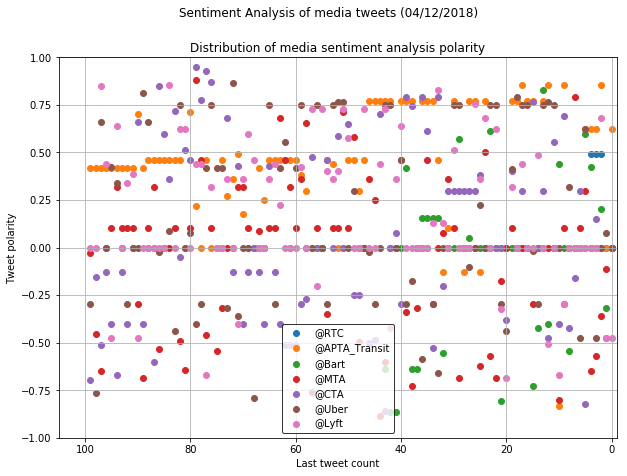

In [22]:
date = time.strftime("%m/%d/%Y")

plt.figure(figsize = (10,7))
plt.xlim(105,-1)
plt.ylim(-1,1)
plt.grid()

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiment_df.loc[news_sentiment_df["User"] == user]
    plt.scatter(dataframe["Tweet Count"],dataframe["Compound"],label = user)    
    

#Title, axis plot
plt.suptitle("Sentiment Analysis of media tweets (%s)"% (date))
plt.title("Distribution of media sentiment analysis polarity")
plt.xlabel("Last tweet count")
plt.ylabel("Tweet polarity")

legend = plt.legend(frameon = True, edgecolor = "black")

# Save an image of the chart and print to screen
plt.savefig("Sentiment_analysis_meadia_tweets.png")
plt.show()


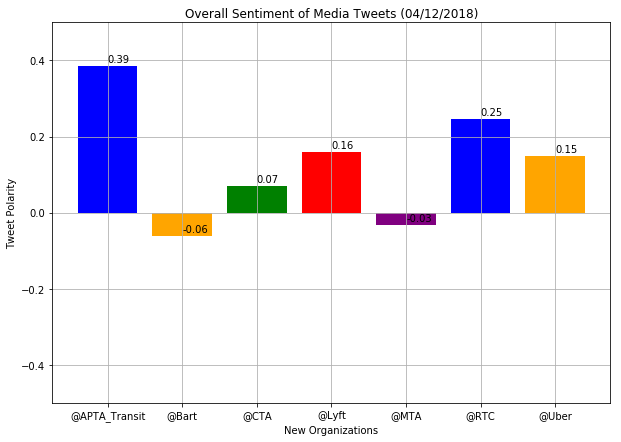

In [23]:
plt.figure(figsize = (10,7))
plt.ylim(-0.5,0.5)
plt.grid()

colors = ["blue", "orange", "green","red","purple"]
x_axis = np.arange(len(news_sentiment_compound_df))
xlabels = news_sentiment_compound_df.index
count = 0

for sentiment in news_sentiment_compound_df:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, news_sentiment_compound_df, tick_label = xlabels, color = colors)
#Set title, x axis label, and y axis label.


plt.title("Overall Sentiment of Media Tweets (%s)"% (date))
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_sentiment_of_media_tweets.png")
plt.show()